# Инициализация библиотек

In [1]:
from numpy import cos, linspace, pi
from math import factorial
import pandas as pd

# Инициализация функции и начальных параметров

In [2]:
def func(x: float):
    """
    Функция y = 2x − cos(x)

    :param x: Точка x
    :return: Значение функции в точке x

    :rtype: float

    """
    return 2 * x - cos(x)


def derv_func(x: float, n: int = 2) -> float:
    """
    Вторая-n производная функции y = 2x − cos(x)

    От второй производной далее, по тригонометрическим свойствам, можно считать n-ю производную

    :param x: Точка x
    :param n: Степень производной. Считается от 2 для удобства.
        + Потому что именно на 2-й производной убирается константа
    :return: Значение функции в точке x

    :rtype: float

    """
    return cos(x + ((n - 2) * pi) / 2)


rng_pos = [3, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
"""Количество точек"""
range_graph = (0.1, 0.6)
"""Промежуток"""

'Промежуток'

# Функции Лагранжа и нормы

In [3]:
def generate_points(rng: tuple[float, float], count_points: int, function) -> list[tuple[float, float]]:
    """
     Генерирование точек с некоторым постоянным шагом

    :param rng: Кортеж границ
    :type rng: tuple[float, float]
    :param count_points: Количество точек, которое нужно сгенерировать
    :type count_points: int
    :param function: Функция
    :type function: function

    :return: Список точек
    :rtype: list[tuple[float, float]]

    """
    res = []
    for pos in linspace(*rng, count_points):
        res.append((pos, function(pos)))
    return res


def lagrange(bp: float, points: list[tuple[float, float]]) -> float:
    """
    Неньютоновская реализация полинома Лагранжа

    :param points: Список точек
    :type points: list[tuple[float, float]]
    :param bp: Точка, значение функции в которой нужно получить
    :type bp: float

    :return: Значение полинома Лагранжа в точке bp
    :rtype: float

    """
    count_points = len(points)
    result = 0
    for k, point in enumerate(points):
        multiply = point[1]
        for j in range(0, k - 1 + 1):
            x = points[j][0]
            multiply *= ((bp - x) / (point[0] - x))
        for i in range(k + 1, count_points):
            x = points[i][0]
            multiply *= ((bp - x) / (point[0] - x))
        result += multiply
    return result


def get_norm(function, rng: tuple[float, float], *args) -> float:
    """
    Получение нормы функции

    :param function: Некоторая функция, норму которой мы хотим получить
    :param rng: Кортеж границ
    :param args: Дополнительные аргументы функции

    :return: Норма функции
    :rtype: float

    """
    return max(abs(function(linspace(*rng, num=10 ** 3), *args)))

# Функция получения ошибок

In [4]:
def rel_error(abs_er: float, norm_f: float) -> float:
    """
    Получение относительной ошибки

    :param abs_er: Абсолютная ошибка
    :param norm_f: Норма функции

    :return: Относительная ошибка
    :rtype: float

    """
    return (abs_er / norm_f) * 100


def teor_error(count_points: int, rng: tuple[float, float]) -> float:
    """
    Получение теоретической ошибки

    :param count_points: Количество точек
    :param rng: Кортеж границ

    :return: Теоретическая ошибка
    :rtype: float

    """
    return (get_norm(derv_func, rng, count_points + 1) / factorial(count_points + 1)) * (
            (rng[1] - rng[0]) ** (count_points + 1))


# Получение DataFrame-ов

In [5]:
abs_e_mass = []
rel_e_mass = []
ter_e_mass = []

for count_pts in rng_pos:
    full_points = generate_points(range_graph, count_pts, func)

    norm = get_norm(func, range_graph)
    lag_norm = get_norm(lagrange, range_graph, full_points)
    # lag_norm = max(abs(lagrange(linspace(*range_graph), full_points)))
    # print(sub_lag_norm, lag_norm)
    abs_e = max(abs(lagrange(linspace(*range_graph, num=10 ** 3), full_points) - func(linspace(*range_graph, num=10 ** 3))))
    # der_e = max(abs(derv_func(linspace(*range_graph))))
    der_e = get_norm(derv_func, range_graph)
    rel_e = rel_error(abs_e, lag_norm)
    ter_e = teor_error(count_pts, range_graph)

    abs_e_mass.append(abs_e)
    rel_e_mass.append(rel_e)
    ter_e_mass.append(ter_e)

abs_df = pd.DataFrame(abs_e_mass, rng_pos, columns=["Value"])
rel_df = pd.DataFrame(rel_e_mass, rng_pos, columns=["Value"])
ter_df = pd.DataFrame(ter_e_mass, rng_pos, columns=["Value"])

total_df = pd.DataFrame({"Абсолютная ошибка": abs_e_mass,
                         "Относительная ошибка": rel_e_mass,
                         "Теоретическая ошибка": ter_e_mass},
                        index=rng_pos)
total_df.to_csv("Все значения.csv")
total_df

,Абсолютная ошибка,Относительная ошибка,Теоретическая ошибка
3,3.766333e-04,4.737501e-02,2.591157e-03
5,3.454608e-07,4.345396e-05,2.159297e-05
10,4.551914e-15,5.725648e-13,6.906975e-12
20,3.770317e-13,4.742513e-11,5.269868e-27
30,1.829403e-10,2.301124e-08,3.197584e-44
40,1.578472e-07,1.985489e-05,7.675644e-63
50,1.356149e-04,1.705839e-02,1.616586e-82
60,9.497883e-02,1.129086e+01,4.824354e-103
70,4.748382e+01,1.016913e+02,2.811774e-124
80,5.736147e+04,1.000014e+02,4.028387e-146


# Построение графиков

<Axes: title={'center': 'Абсолютная ошибка'}, xlabel='n', ylabel='Разность'>

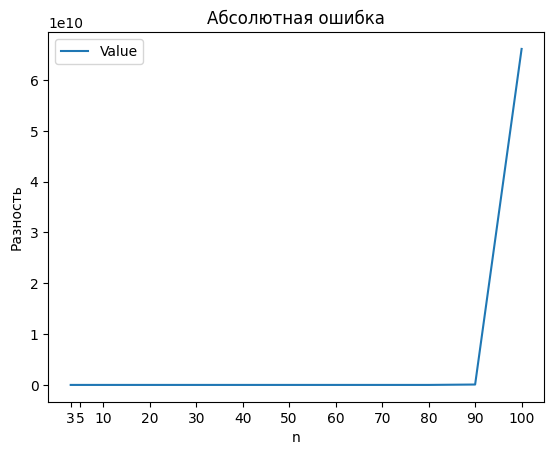

In [6]:
abs_df.plot(title="Абсолютная ошибка", xticks=rng_pos, xlabel="n", ylabel="Разность")

<Axes: title={'center': 'Относительная ошибка'}, xlabel='n', ylabel='%'>

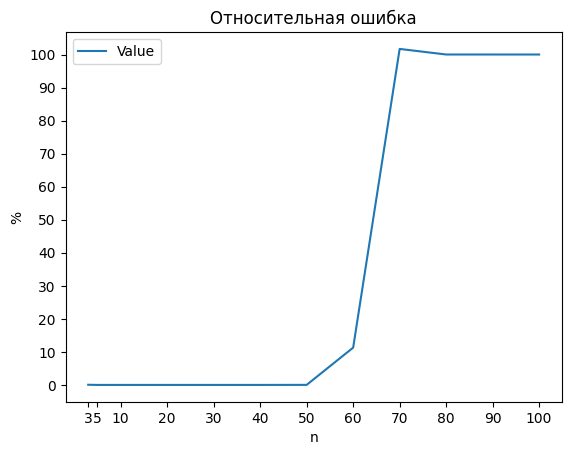

In [7]:
rel_df.plot(title="Относительная ошибка", xticks=rng_pos, yticks=range(0, 100 + 1, 10), xlabel="n", ylabel="%")

<Axes: title={'center': 'Теоретическая ошибка'}, xlabel='n', ylabel='Разность'>

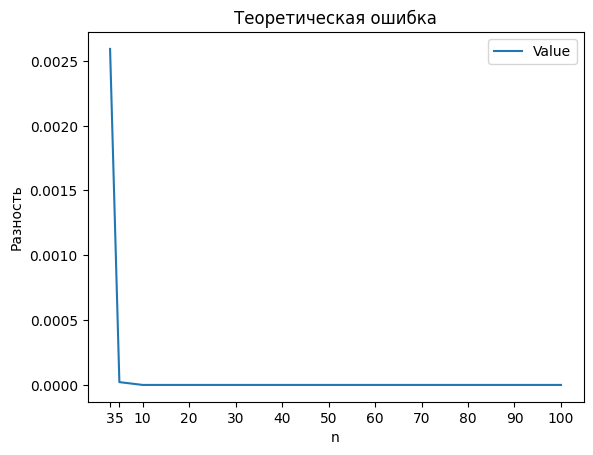

In [8]:
ter_df.plot(title="Теоретическая ошибка", xticks=rng_pos, xlabel="n", ylabel="Разность")

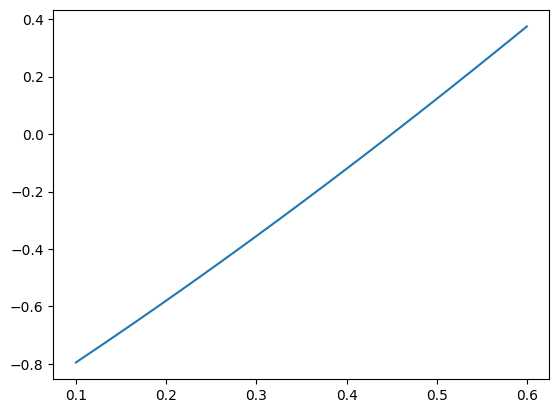

In [9]:
import matplotlib.pyplot as plt

plt.plot(func(linspace(*range_graph, num=10 ** 3)))
plt.xticks([i for i in range(0, 10**3 + 1, 200)], [0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
plt.show()